## Exercise 1: The Driven Pendulum
Aim: to explore the physics of non-linear oscillator by accurate integration of its equation of motion.

### Core task 1

First, re-write the second-order differential equation into a pair of linked 1st order equations by letting $y_0 = \theta$ and $y_1 = \dot{\theta}$:
$$ 
\dot{y}_0 = y_1\\
\dot{y}_1 = -\sin(y_0) - qy_1 + F\sin(\Omega_D t)
$$
where $q = \frac{\alpha}{ml}$ and $F = \frac{G}{ml^2}$. Taking $l=g$ and $\Omega = 2/3$ rad s $^{-1}$. Initial conditions: at $t=0$,  $y_0=\theta_0$ and $y_1=0$.


Theoretical solution for small angle:
$$
\theta = \theta_0 \cos t

$$

In [1]:
# Import relevant modules and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 

Omega_D = 2/3 # Driving frequency
T = 2 * np.pi # Natural period of small oscialltions

# Define the differential equation
def derivatives(t, y, q,  F, Omega_D):
    theta, omega = y
    return [omega, -1 * np.sin(theta) - q * omega + F * np.sin(Omega_D * t)]

#############################--- Solving the ODE ---#######################################
# Define parameters
y0 = (0.01, 0.0) # Initial conditions
q, F = 0, 0      
oscillations = 10000
t0, tf = 0, oscillations * T
solution = scipy.integrate.solve_ivp(fun = derivatives,
                                    t_span = (t0, tf),
                                    y0 = y0,
                                    method = "RK45",
                                    args = (q, F, Omega_D),
                                    t_eval=np.arange(t0, tf, 0.01),
                                    rtol = 1e-6,
                                    atol = 1e-8
                                    )
def theoretical_solution(t, theta_0):
    return [theta_0 * np.cos(t), theta_0 * np.sin(t)]

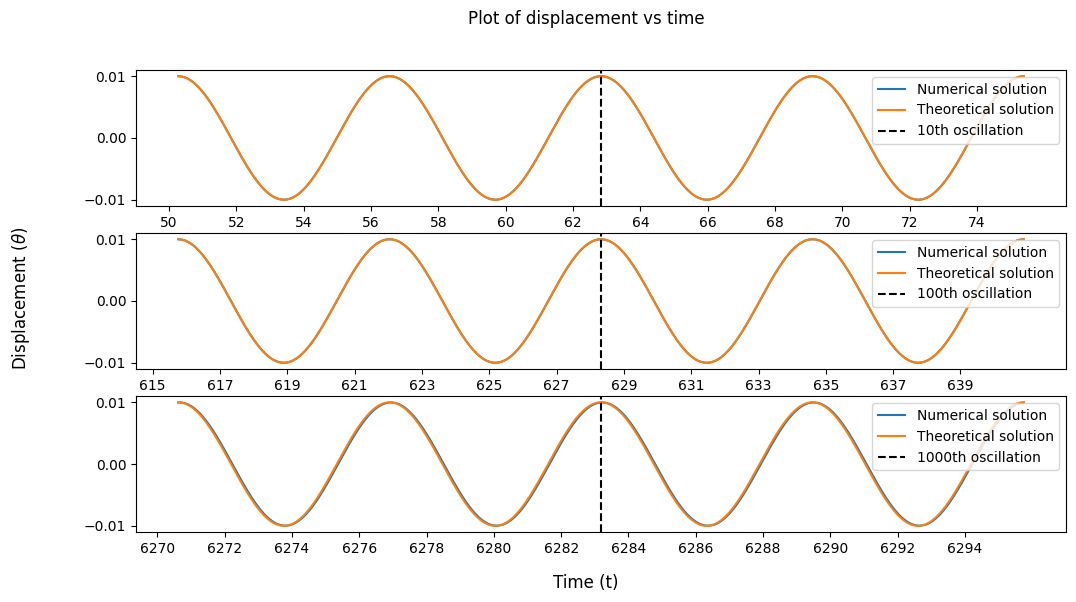

In [2]:
# Plot of displacement vs time
fig, ax = plt.subplots(3,1, figsize=(12,6))
t, theta, omega = solution.t, solution.y[0], solution.y[1]
for i in range(3):
    period = [10, 100, 1000][i]
    lower_bound_t = (period-2) * T
    upper_bound_t = (period+2) * T
    x = np.where(np.logical_and(t > lower_bound_t, t < upper_bound_t))
    ax[i].plot(t[x], theta[x], label='Numerical solution')
    ax[i].plot(t[x], theoretical_solution(t[x], y0[0])[0], label='Theoretical solution')
    ax[i].axvline(x=period * T, color='k', linestyle='--', label=f"{period}th oscillation")
    ax[i].legend(loc='upper right')
    ax[i].xaxis.set_ticks(range(int(np.floor(t[x][0])), int(np.ceil(t[x][-1])), 2))

fig.suptitle('Plot of displacement vs time')
fig.supxlabel('Time (t)')
fig.supylabel(r'Displacement ($\theta$)')
plt.show()

Testing conservation of energy:

$$ \text{Total energy} = \text{Kinetic energy} + \text{Gravitational potential energy} \\
= \frac{1}{2}ml^2 \omega^2 + mgl(1-\cos \theta)\\
= \frac{1}{2}ml^2(\omega^2 + 2 - 2\cos\theta)
$$ 

Therefore, the total energy of the pendulum is proportional to $\omega^2 + 2 - 2\cos\theta$, where I have used $l=g$.



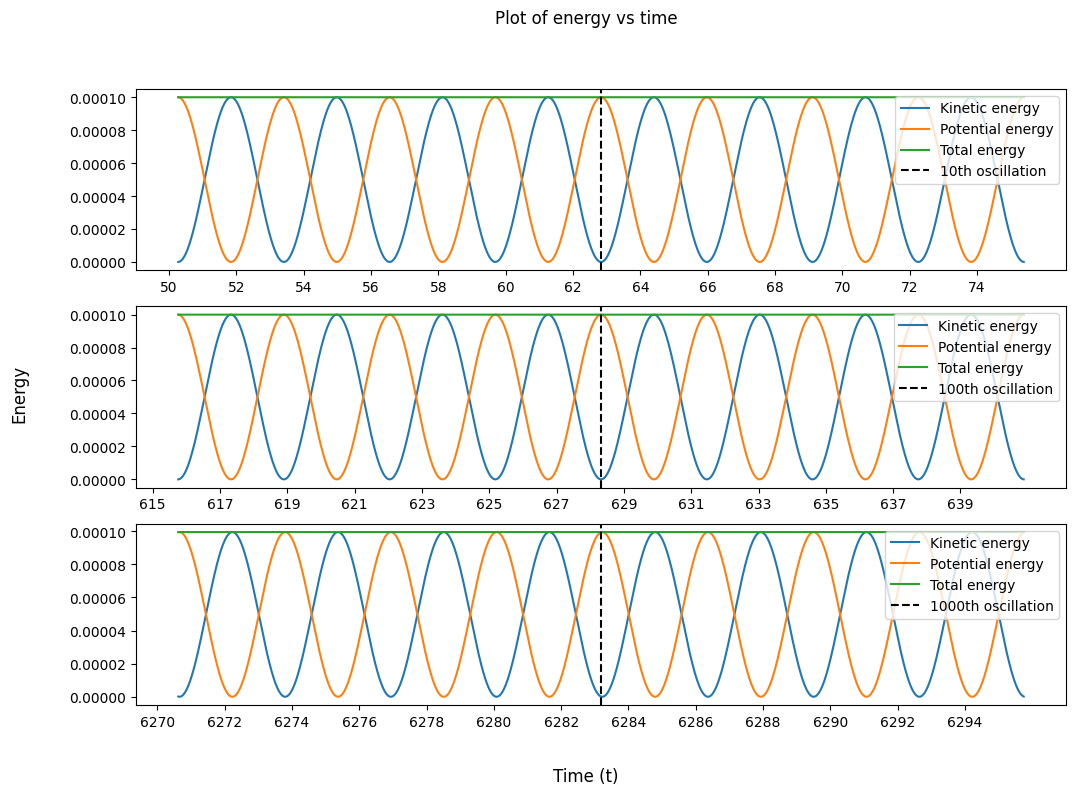

In [3]:
# Plot of energy vs time
fig, ax = plt.subplots(3,1, figsize=(12,8))
t, theta, omega = solution.t, solution.y[0], solution.y[1]
for i in range(3):
    period = [10, 100, 1000, 10000][i]
    lower_bound_t = (period-2) * T
    upper_bound_t = (period+2) * T
    x = np.where(np.logical_and(t > lower_bound_t, t < upper_bound_t))
    ax[i].plot(t[x], omega[x]**2, label='Kinetic energy')
    ax[i].plot(t[x], 2 * (1-np.cos(theta[x])), label='Potential energy')
    ax[i].plot(t[x], omega[x]**2 + 2 * (1-np.cos(theta[x])), label='Total energy')
    ax[i].axvline(x=period * T, color='k', linestyle='--', label=f"{period}th oscillation")
    ax[i].legend(loc='upper right')
    ax[i].xaxis.set_ticks(range(int(np.floor(t[x][0])), int(np.ceil(t[x][-1])), 2))

fig.suptitle('Plot of energy vs time')
fig.supxlabel('Time (t)')
fig.supylabel(r'Energy')
plt.show()

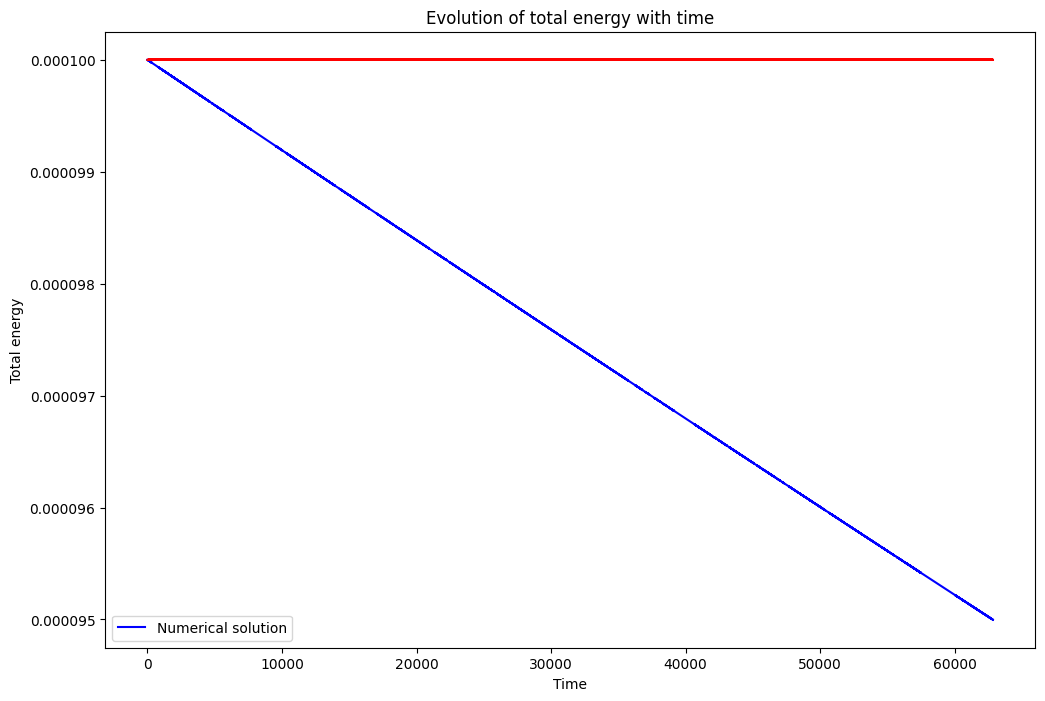

In [6]:
# Plot of total energy vs time #
plt.figure(figsize=(12,8))
analytical_solution = theoretical_solution(t, y0[0])
analytical_total_E = analytical_solution[1]**2 + 2*(1 - np.cos(analytical_solution[0]))
numerical_total_E = omega**2 + 2*(1 - np.cos(theta))   

plt.plot(t, numerical_total_E, label='Numerical solution', color='b')
plt.plot(t, analytical_total_E, color='r')
plt.xlabel('Time')
plt.legend()
plt.ylabel('Total energy')
plt.title("Evolution of total energy with time")
plt.show()

In [7]:
# Investigate period v.s. initial displacement, theta_0 #
n = 5
theta_0_list = np.linspace(0.01, np.pi, n)
def zero_crossing(t, y, *args): return y[0]

# Define parameter
q, F = 0, 0
oscillations = 20
t0, tf = 0, oscillations * T

# Solve the ODE for different initial conditions
solutions = {}
for i in range(len(theta_0_list)):
    theta_0 = theta_0_list[i]
    y0 = (theta_0, 0.0) # Initial conditions
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (t0, tf),
                                        y0 = y0,
                                        method = "RK45",
                                        args = (q, F, Omega_D),
                                        t_eval=np.arange(t0, tf, 0.05),
                                        rtol = 1e-6,
                                        atol = 1e-8,
                                        events=zero_crossing
                                        )
    solutions[theta_0] = solution.t, solution.y[0], solution.y[1], solution.t_events[0]

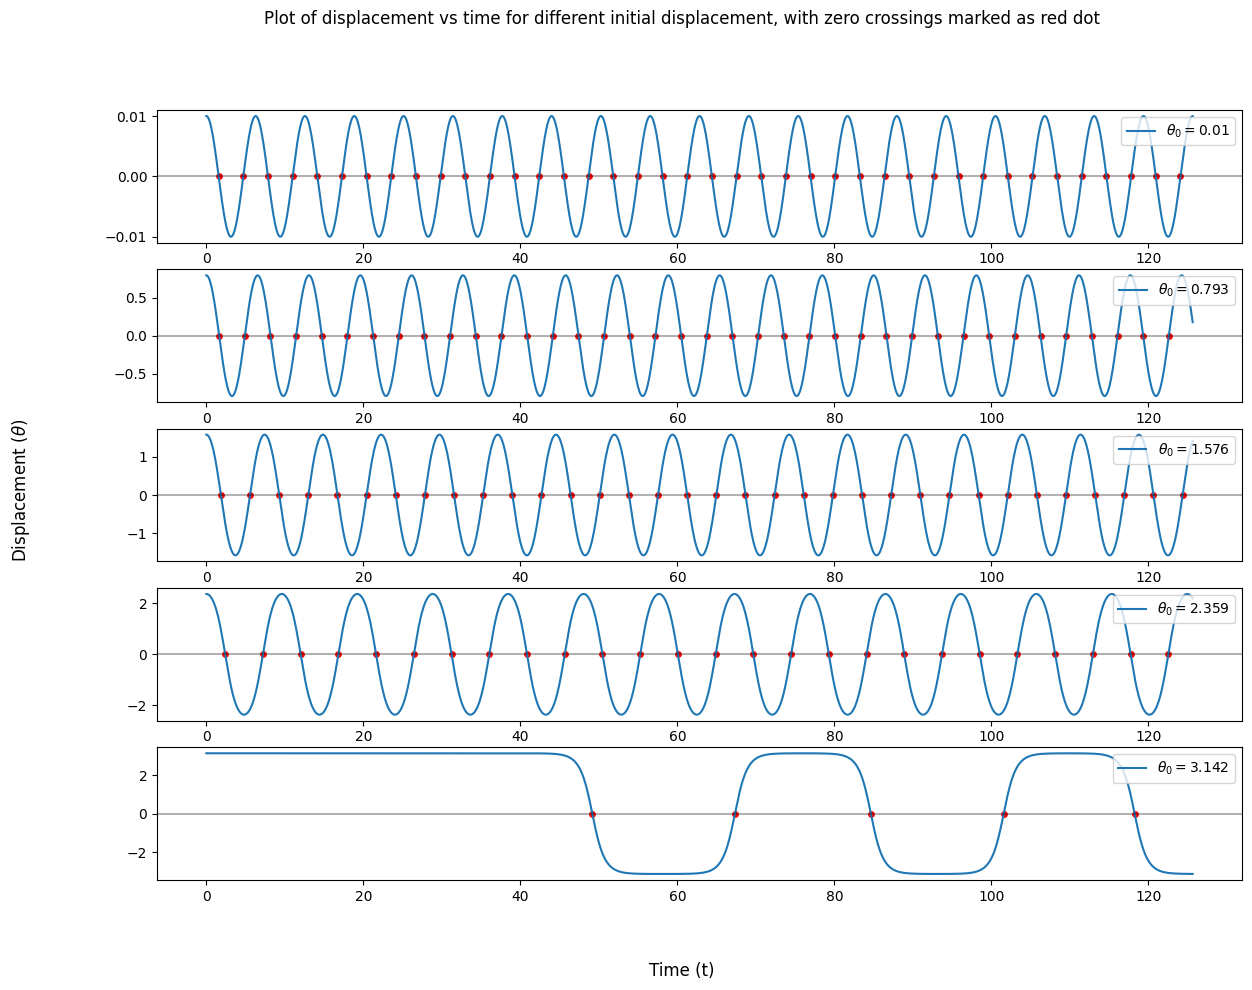

In [8]:
# Plot the solutions
fig, ax = plt.subplots(n,1, figsize=(14,10))
for i in range(len(theta_0_list)):
    theta_0 = theta_0_list[i]
    t, theta, omega, zero_crossings = solutions[theta_0] 
    ax[i].plot(t, theta, label=f'$\\theta_0 = {round(theta_0, 3)}$')
    # ax[i].plot(t, theoretical_solution(t, theta_0)[0], label='Small-angle approx.')
    ax[i].axhline(y=0, color='k', alpha=0.3)
    
    ax[i].scatter(zero_crossings, [0]*len(zero_crossings), color='r', s=15)
    ax[i].legend(loc='upper right')

fig.suptitle('Plot of displacement vs time for different initial displacement, with zero crossings marked as red dot')
fig.supxlabel('Time (t)')
fig.supylabel(r'Displacement ($\theta$)')
plt.show()

In [9]:
# Investigate period v.s. initial displacement, theta_0 #
n = 200
theta_0_list = np.linspace(0.01, np.pi-0.005, n)
def zero_crossing(t, y, *args): return y[0]
# Define parameter
q, F = 0, 0
oscillations = 100
t0, tf = 0, oscillations * T
# Solve the ODE for different initial conditions
periods = []
for i in range(len(theta_0_list)):

    theta_0 = theta_0_list[i]
    y0 = (theta_0, 0.0) # Initial conditions
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (t0, tf),
                                        y0 = y0,
                                        method = "RK45",
                                        args = (q, F, Omega_D),
                                        t_eval=np.arange(t0, tf, 0.05),
                                        rtol = 1e-6,
                                        atol = 1e-8,
                                        events=zero_crossing
                                        )
    zero_crossings = solution.t_events[0]
    periods.append(np.mean(np.diff(zero_crossings)))
periods = np.array(periods)

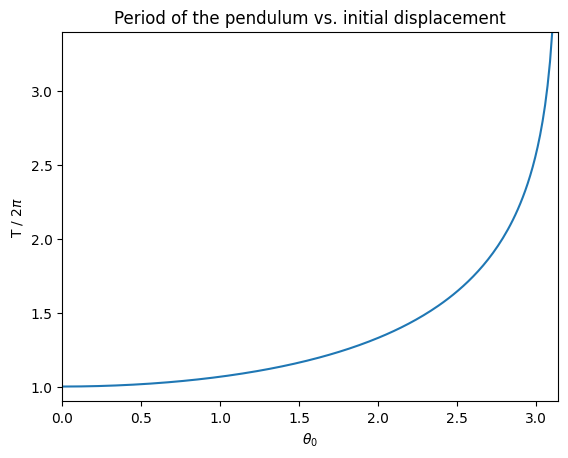

In [10]:
# Plot the solutions
plt.plot(theta_0_list, periods*2/(2*np.pi))
plt.xlabel("$\\theta_0$")
plt.ylabel("T / 2$\pi$")

plt.xlim(0, np.pi)
plt.ylim(0.9,3.4)
plt.title("Period of the pendulum vs. initial displacement")
plt.show()

#### Conclusion (Core task 1):
- For large number of oscillations, above about 500 oscillations, the energy decreases away from what is theoretically expected. This might be due to accumulation of error terms over time in the numerical solution compared to the theoretical solution which only considered small-angle approximation. 
- I managed to solve the pendulum equation numerically and compare it to analytical small-angle solution solution.
- The period diverges away from $2\pi$ s as the initial displacement increases.
- Through this exercise, I explored the behaviour of the simple undamped pendulum beyond the small-angle approximation.
- Period for $\theta_0 = \pi/2$ is about 15 s.


### Core task 2

Turn on damping.

Turn on driving force.

Solving damped undriven oscialltor under small angle approximation:
$$
\ddot{\theta} + q\dot{\theta} + \theta = 0
$$

Solution:
$$
\theta = Ae^{m_+t} + Be^{m_-t}
$$
where $m_\pm = \frac{-q \pm \sqrt{q^2 - 4}}{2}$

If q < 2, light damping regime:
$$
\theta = \theta_0 e^{-\frac{q}{2}t}\left(\frac{q}{\sqrt{4-q^2}}\sin \frac{\sqrt{4-q^2}}{2} \; t +  \cos \frac{\sqrt{4-q^2}}{2}\;t\right)
$$

If q = 2, citical damping:
$$
\theta = \theta_0\left(t + 1\right)e^{-t}
$$

If q > 2, heavy damping regime:
$$
\theta = \frac{\theta_0 m_-}{m_-m_+}\left((m_+-1)e^{m_- t} + e^{m_+ t}\right)
$$







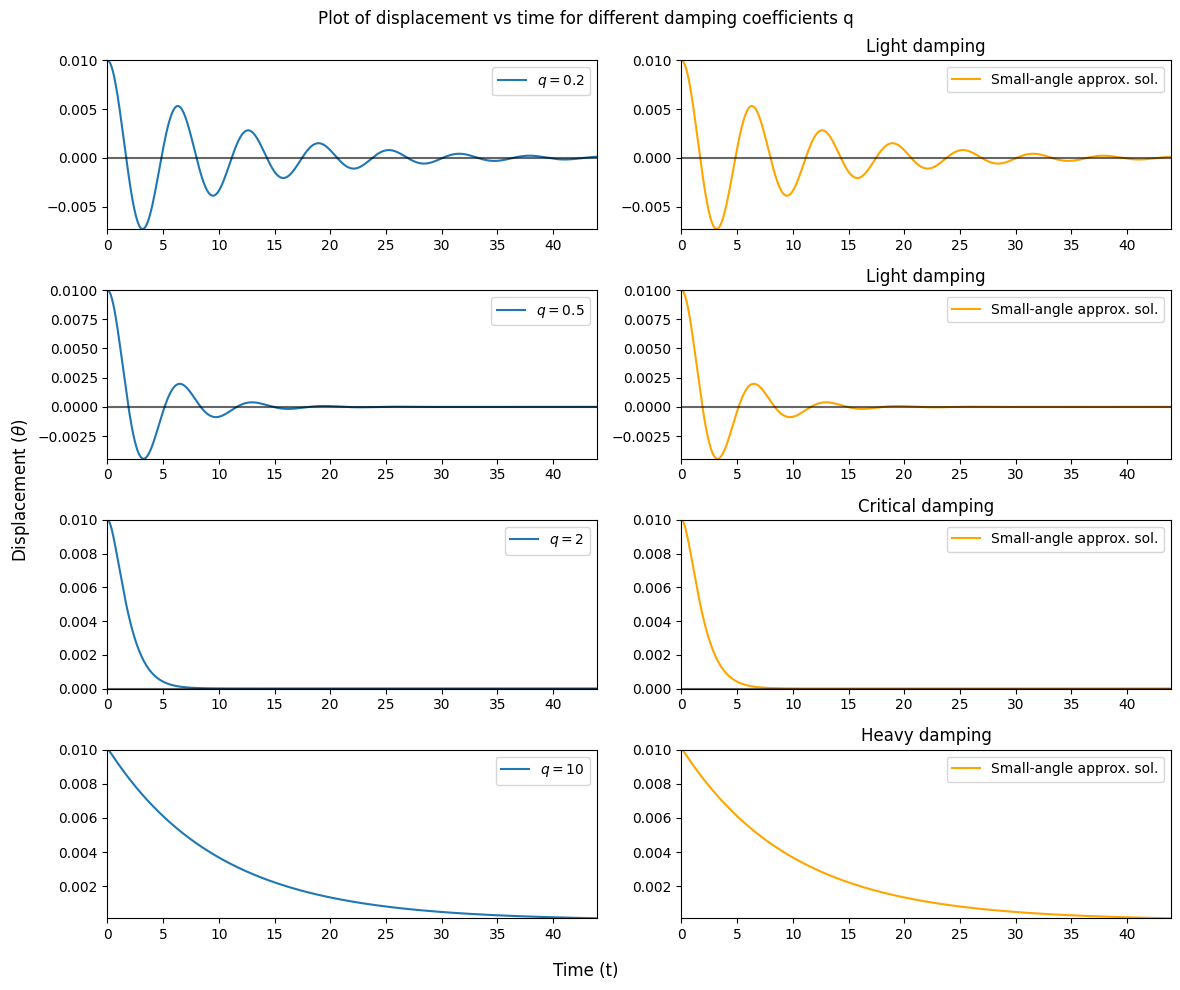

In [11]:
# Define parameter
theta_0 = 0.01
y0 = (theta_0, 0.0) # Initial conditions
q_list = [0.2, 0.5, 2, 10]
F = 0 
oscillations = 7
t0, tf = 0, oscillations * T

# Solve the ODE for different initial conditions
solutions = {}
for q in q_list:
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (t0, tf),
                                        y0 = y0,
                                        method = "RK45",
                                        args = (q, F, Omega_D),
                                        t_eval=np.arange(t0, tf, 0.05),
                                        rtol = 1e-6,
                                        atol = 1e-8,
                                        )
    solutions[q] = solution.t, solution.y[0], solution.y[1]

def theoretical_light_damping(t, theta_0, q):
    return theta_0 * np.exp(-1 * q/2 * t) * (q / (np.sqrt(4-q**2)) * np.sin(np.sqrt(4-q**2)*t/2) + np.cos(np.sqrt(4-q**2)*t/2))
def theoretical_critical_damping(t, theta_0):
    return theta_0 * (1 +t) * np.exp(-1 * t)
def theoretical_heavy_damping(t, theta_0, q):
    m1 = (-q + np.sqrt(q**2-4))/2
    m2=  (-q - np.sqrt(q**2-4))/2
    return theta_0 / (m2-m1) * (-1*m1*np.exp(m2*t) + m2* np.exp(m1*t))

# Plot the solutions
fig, ax = plt.subplots(len(q_list), 2, figsize=(12,10))
for i in range(len(q_list)):
    t, theta, omega = solutions[q_list[i]] 
    ax[i][0].plot(t, theta, label=f'$q = {q_list[i]}$')
    # ax[i][0].plot(t, theoretical_solution(t, theta_0)[0], label='Small-angle approx.')
    if q_list[i] < 2:
        ax[i][1].set_title('Light damping') 
        ax[i][1].plot(t, theoretical_light_damping(t, theta_0, q=q_list[i]), label='Small-angle approx. sol.', color = 'orange')
    if q_list[i] == 2:
        ax[i][1].set_title('Critical damping')
        ax[i][1].plot(t, theoretical_critical_damping(t, theta_0), label='Small-angle approx. sol.', color = 'orange')
    if q_list[i] > 2:
        ax[i][1].set_title('Heavy damping')
        ax[i][1].plot(t, theoretical_heavy_damping(t, theta_0, q=q_list[i]), label='Small-angle approx. sol.', color = 'orange')

    ax[i][0].axhline(y=0, color='k', alpha=0.6)
    ax[i][0].legend(loc='upper right')
    ax[i][0].set_ylim(theta.min(), theta.max())
    ax[i][0].set_xlim(t.min(), t.max())

    ax[i][1].axhline(y=0, color='k', alpha=0.6)
    ax[i][1].legend(loc='upper right')
    ax[i][1].set_ylim(theta.min(), theta.max())
    ax[i][1].set_xlim(t.min(), t.max())

fig.suptitle('Plot of displacement vs time for different damping coefficients q')
fig.supxlabel('Time (t)')
fig.supylabel(r'Displacement ($\theta$)')
plt.tight_layout()
plt.show()

In [12]:
# Turn on driving force, keeping damping constant at q = 0.5
def zero_crossing(t, y, *args): return y[0]
def apex(t, y, *args): return y[1]
# Define parameter
y0 = (0.01, 0.0) # Initial conditions
q = 0.5
F_list = [0.5, 1.2, 1.44, 1.465]
oscillations = 30
t0, tf = 0, oscillations * T

# Solve the ODE for different initial conditions
solutions = {}
for F in F_list:
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (t0, tf),
                                        y0 = y0,
                                        method = "RK45",
                                        args = (q, F, Omega_D),
                                        # t_eval=np.arange(t0, tf, 0.001),
                                        rtol = 1e-8,
                                        atol = 1e-10,
                                        events=(zero_crossing, apex)
                                        )
    solutions[F] = solution.t, solution.y[0], solution.y[1], solution.t_events[0], solution.t_events[1]


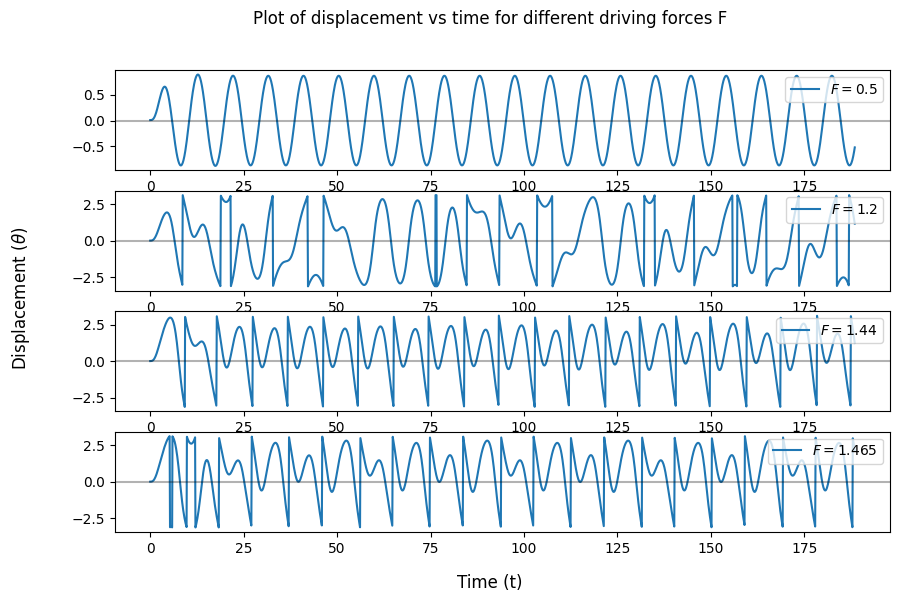

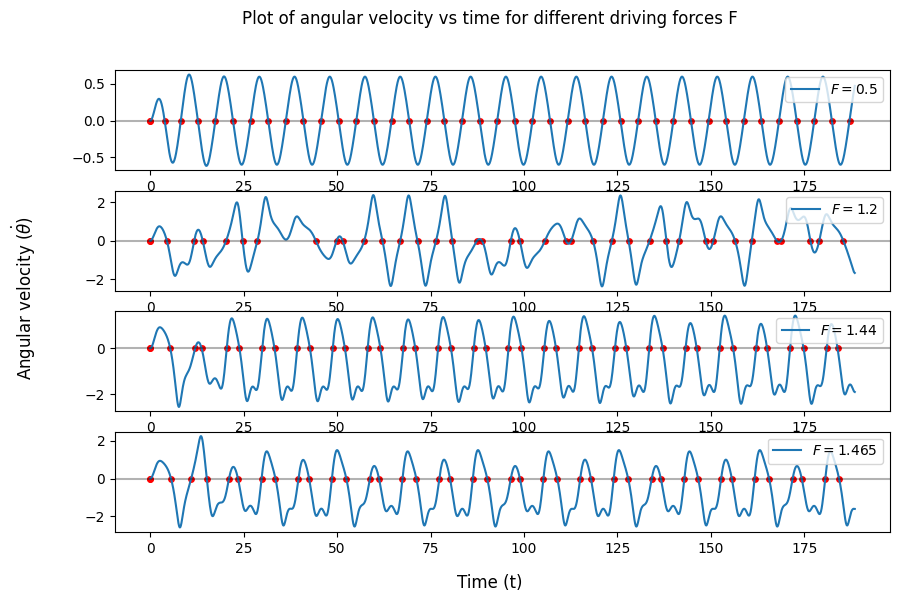

In [13]:
# Plot the solutions
fig, ax = plt.subplots(len(F_list), 1, figsize=(10,6))
for i in range(len(F_list)):
    t, theta, omega, zero_crossings, apex = solutions[F_list[i]] 
    normalized_theta = [(theta + np.pi) % (2 * np.pi) - np.pi for theta in theta]
    ax[i].plot(t, normalized_theta, label=f'$F = {F_list[i]}$')
    ax[i].axhline(y=0, color='k', alpha=0.3)
    ax[i].legend(loc='upper right')

fig.suptitle('Plot of displacement vs time for different driving forces F')
fig.supxlabel('Time (t)')
fig.supylabel(r'Displacement ($\theta$)')
plt.show()

fig, ax = plt.subplots(len(F_list), 1, figsize=(10,6))
for i in range(len(F_list)):
    t, theta, omega, zero_crossings, apex = solutions[F_list[i]] 
    normalized_theta = [(theta + np.pi) % (2 * np.pi) - np.pi for theta in theta]
    ax[i].scatter(apex, [0]*len(apex), color='r', s=15)
    ax[i].plot(t, omega, label=f'$F = {F_list[i]}$')
    ax[i].axhline(y=0, color='k', alpha=0.3)
    ax[i].legend(loc='upper right')

fig.suptitle('Plot of angular velocity vs time for different driving forces F')
fig.supxlabel('Time (t)')
fig.supylabel(r'Angular velocity ($\dot{\theta}$)')
plt.show()

#### Conclusion (core task 2)
- Expected regimes of light damping, critical damping, heavy damping behaviours are reproduced numerically, for different values of F. They agree with small-angle approximation analytical solution.
- The period of oscillation becomes asymmetrical between swings.

### Supplementary task 1: sensitivity to initial conditions








In [14]:
# Define parameter
y0_list = [(0.2, 0.0), (0.20001, 0.0)] # Initial conditions
q, F = 0, 1.2
oscillations = 5000
t0, tf = 0, oscillations * T

# Solve the ODE for different initial conditions
solutions = {}
for y0 in y0_list:
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (t0, tf),
                                        y0 = y0,
                                        method = "RK45",
                                        args = (q, F, Omega_D),
                                        # t_eval=np.arange(t0, tf, 0.001),
                                        rtol = 1e-8,
                                        atol = 1e-10,
                                        )
    solutions[y0[0]] = solution.t, solution.y[0], solution.y[1]

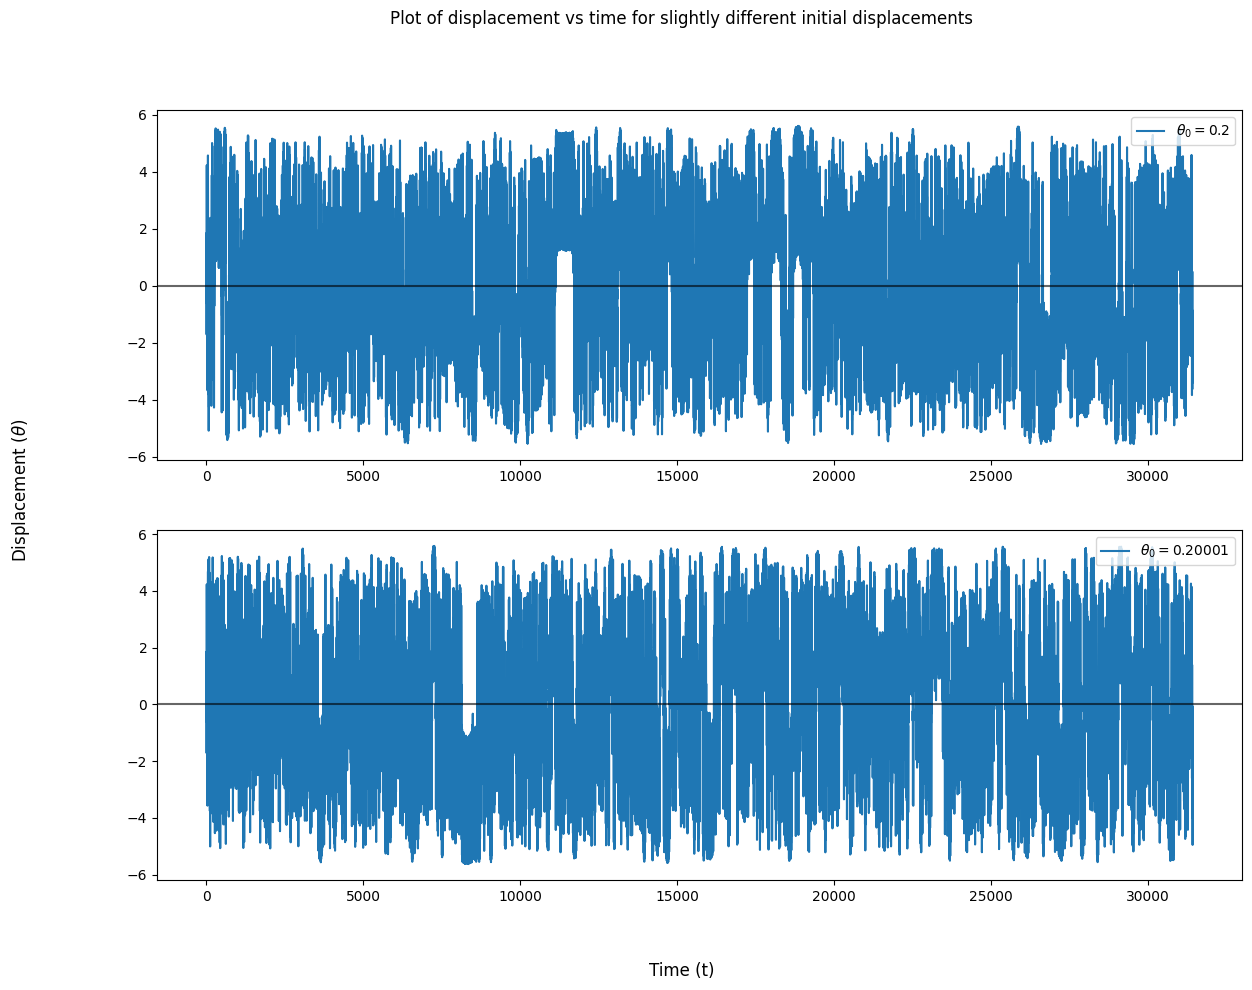

In [15]:
fig, ax = plt.subplots(len(y0_list), 1, figsize=(14,10))
for i in range(len(y0_list)):
    theta_0 = y0_list[i][0]
    t, theta, omega = solutions[theta_0] 
    ax[i].plot(t, omega, label=f'$\\theta_0 = {theta_0}$')
    ax[i].legend(loc='upper right')
    ax[i].axhline(y=0, color='k', alpha=0.6)

fig.suptitle('Plot of displacement vs time for slightly different initial displacements')
fig.supxlabel('Time (t)')
fig.supylabel(r'Displacement ($\theta$)')
plt.show()

#### Conclusion (Supplementary task 1):
- The solutions diverges, numerical integration of the pendulum differential equation with forcing term is very sensitive to initial conditions.

### Supplementary task 2: angle vs angular speed


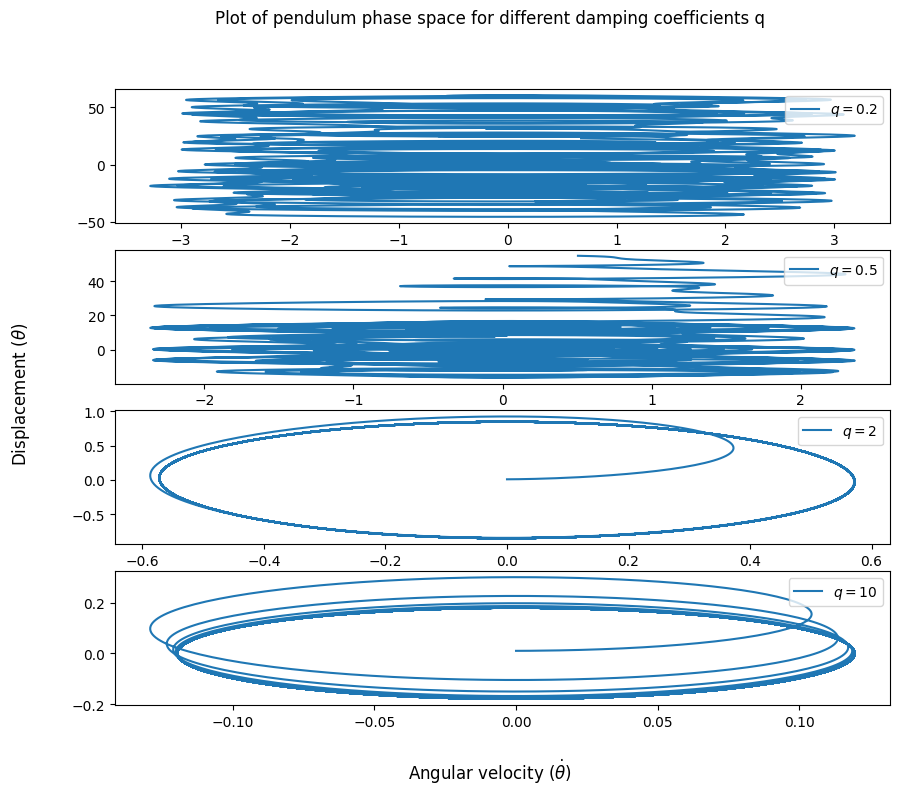

In [16]:
# Define parameter
theta_0 = 0.01
y0 = (theta_0, 0.0) # Initial conditions
q_list = [0.2, 0.5, 2, 10]
F = 1.2
oscillations = 100
t0, tf = 0, oscillations * T

# Solve the ODE for different initial conditions
solutions = {}
for q in q_list:
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (t0, tf),
                                        y0 = y0,
                                        method = "RK45",
                                        args = (q, F, Omega_D),
                                        t_eval=np.arange(t0, tf, 0.05),
                                        rtol = 1e-6,
                                        atol = 1e-8,
                                        )
    solutions[q] = solution.t, solution.y[0], solution.y[1]

# Plot the solutions
fig, ax = plt.subplots(len(q_list), 1, figsize=(10,8))
for i in range(len(q_list)):
    t, theta, omega = solutions[q_list[i]] 
    ax[i].plot(omega, theta, label=f'$q = {q_list[i]}$')
    ax[i].legend(loc='upper right')

fig.suptitle('Plot of pendulum phase space for different damping coefficients q')
fig.supxlabel(r'Angular velocity ($\dot{\theta}$)')
fig.supylabel(r'Displacement ($\theta$)')
plt.show()

#### Conclusions (Supplementary task 2):
- At low damping, chaotic behaviour is prominent.
- However, as damping is increased, chaotic behaviour in phase space is reduced.